# Z-test for synthetic data

In [36]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt

In [34]:
np.random.seed(0)

In [48]:
N = 100
mu = .2
sigma = 1
x = np.random.randn(N)*sigma + mu

In [49]:
# two-sided test
ztest(x)

(2.599440745939064, 0.009337579758932124)

In [50]:
# two-sided test own code
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = mu_hat/(sigma_hat/np.sqrt(N)) # the mu0 = 0
p_right = 1 - norm.cdf(np.abs(z)) # we can use norm.sf (survival function) instead of 1 - norm.cdf
p_left = norm.cdf(-np.abs(z))

p = p_right + p_left

z, p

(2.599440745939064, 0.009337579758932124)

In [51]:
# one-sided test
ztest(x, alternative='larger')

(2.599440745939064, 0.004668789879466062)

In [55]:
# one-sided test with our own code
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = mu_hat/(sigma_hat/np.sqrt(N))

p_right = 1 - norm.cdf(z) #norm.sf(z)

z, p_right

(2.599440745939064, 0.004668789879466062)

In [56]:
# null under a different reference value
mu0 = 0.2
ztest(x, value=mu0)

(0.4648616798782692, 0.642030513949184)

In [58]:
# our own code
mu_hat = x.mean()
sigma_hat = x.std(ddof=1)
z = (mu_hat - mu0)/(sigma_hat/np.sqrt(N))
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p = p_right + p_left

z, p

(0.4648616798782692, 0.642030513949184)

In [69]:
# two-sample test
N0 = 100
mu0 = .2
sigma0 = 1
x0 = np.random.randn(N0)*sigma0 + mu0

N1 = 100
mu1 = .5
sigma1 = 1
x1 = np.random.randn(N1)*sigma1 + mu1

(array([ 3.,  3.,  9., 14., 23., 14., 15., 11.,  6.,  2.]),
 array([-1.8536404 , -1.38453539, -0.91543039, -0.44632538,  0.02277962,
         0.49188463,  0.96098964,  1.43009464,  1.89919965,  2.36830466,
         2.83740966]),
 <BarContainer object of 10 artists>)

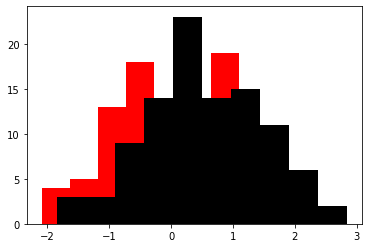

In [70]:
# Plotting generated distribution
plt.hist(x0, color = 'r')
plt.hist(x1, color = 'black')

In [71]:
ztest(x0, x1)

(-3.2447277831603767, 0.0011756294983814993)

In [76]:
# our own code
mu_hat0 = x0.mean()
mu_hat1 = x1.mean()
delta = mu_hat0 - mu_hat1

sigma0_hat = x0.std(ddof=1)
sigma1_hat = x1.std(ddof=1)

s_sigma_delta = np.sqrt(sigma0_hat**2/N0 + sigma1_hat**2/N1)

z = delta/s_sigma_delta

p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))

p = p_right + p_left

z, p, p_right, p_left

(-3.2447277831603767,
 0.0011756294983815345,
 0.0005878147491907848,
 0.0005878147491907497)

In [83]:
# show that we will reject the null hypothesis when the null hypothesis is true (false alarm) 5% of the time
num_tests = 10000
results = np.zeros(num_tests)

for i in range(num_tests):
    x1 = np.random.randn(1000000)
    x2 = np.random.randn(1000000)
    z, p = ztest(x1, x2)
    
    results[i] = (p < 0.05)
    
print(results.mean())

0.0515
